## example

we have the following system, and this is the Matrix of coefficentes $A$ asociated to a vector of unknows.
\begin{bmatrix}
50 & 30 \\
3 & 5 
\end{bmatrix}
and $d$ a matrix of parameters.
\begin{bmatrix}
200 \\
200 
\end{bmatrix}

In [2]:
import numpy as np
A  = np.matrix([[50,30],[3,5]])
d = np.matrix([[200],[200]])
##  inverse of A
A_t = np.linalg.inv(A)
print(A)
print(A_t)
x = A_t* d
print(x)
# also we can uses
#in shorthand.
np.linalg.solve(A, d)

[[50 30]
 [ 3  5]]
[[ 0.03125 -0.1875 ]
 [-0.01875  0.3125 ]]
[[-31.25]
 [ 58.75]]


matrix([[-31.25],
        [ 58.75]])

# Simplex algorithm





# Introduction to scipy.

## Method nelder-mead.


### Quadratic equation in python


In [3]:
#minimize with scalar

# Convex optimization
 $$  x_{1}^{2} + x_{1} * x_{2} $$
 constrained
 \begin{equation}
 x_{1}^{3} * x_{2} = 100 \\
 x_{1}^{3}+ x_{1} * x_{2} >= 50 \\
 -100 <= x_{1},x_{2} <= 100
 \end{equation}

we need the following elements:
 * fun _fuction to minimize_
 * x0 _initial values_
 * method _type of solver_
 * bounds _bounds on variables_
 * constrains _list of constrains_



In [4]:
import numpy as np
from scipy.optimize import minimize 
def objec(x):
    x1=x[0]
    x2=x[1]
    return x1**2 + x1*x2
def c1(x):
     x1=x[0]
     x2=x[1]
     return x1**3 + x1 * x2 -100
    
def c2(x):
    x1=x[0]
    x2=x[1]
    return x1**3 + x2 - 50

bound_x1=(-100,100)
bound_x2 = (-100,100)
bounds = [bound_x1, bound_x2]

constrain1= {'type': 'eq', 'fun': c1}
constrain2= {'type':'ineq', 'fun': c2}

constrain = [constrain1, constrain2]

x0=[1,1]

result = minimize(objec , x0, method = 'SLSQP', bounds = bounds, constraints= constrain)

print(result)
    

     fun: -937.1265182445782
     jac: array([-79.06639099,  10.46679688])
 message: 'Optimization terminated successfully.'
    nfev: 38
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([  10.46680532, -100.        ])


# Lagrange multiplier

The following problem it is maximize the utility of a consumer, whose utility function it is a concave function of the following way $ U(x,y) = x^{\beta}y ^{\alpha}$
$$ \max U(x,y)$$
constrained:
$$  p_{x} x + p_{y} y = I $$

According to the lagrange function; the optimizer point it is 
$$ \frac{UM_x}{px} = \frac{UM_y}{py}$$

solving and replacing in the budget constrain we have:

$$ x^{*} =  \frac{ I \alpha } { (\alpha + \beta)px } $$

$$ y^{*}=  \frac{ I \beta } { (\alpha + \beta)py } $$

thus if we call  a function of spent we have $S(x^{*},y^{*}) -I = 0$ and therefore the implications of this functional form is that the exponentials means the constant part of the compsution.

for this function also we assume that  $\beta + \alpha = 1 $ and for this case that $\alpha = 0.6 $  and therefore $\beta = 0.4$

# Take in account that the program minimize
## The dual theorem

In [6]:
# Analytical solution
alpha =0.4
beta = 0.6
income =20 
pricex= 3
pricey= 10
# According to the paramters we have.
x_opt = (income*alpha) / (((alpha+beta)) * pricex)
y_opt = (income*beta) / (((alpha+beta)) * pricey)
walras_law = (pricex*x_opt + pricey*y_opt ) - income
utility_opt = (x_opt**alpha)
print("The points that maximize are")
print("the x point ", x_opt, " the y point, " ,y_opt, " the walras law is"  , walras_law)
print()
def utility(v):
    x=v[0]
    y=v[1]
    return -1*(x**alpha * y** beta)
def c1(v):
     x=v[0]
     y=v[1]
     return  x * pricex + y *pricey - income
    
constrain1= {'type': 'eq', 'fun': c1}

constrain = [constrain1]
x0=[1,1]
boundx1=(0,999)
boundx2=(0,999)
bound = [boundx1, boundx2]
result = minimize(utility , x0,  bounds=bound ,constraints= constrain)
print(result)


The points that maximize are
the x point  2.6666666666666665  the y point,  1.2  the walras law is 0.0

     fun: -1.6515667188344816
     jac: array([-0.24795869, -0.82528703])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([2.66426106, 1.20072168])


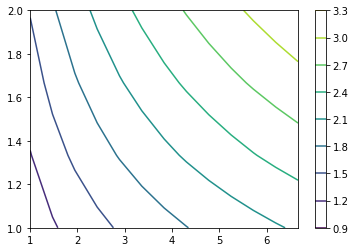

In [7]:
import numpy as np
## Max products
max_x = income/pricex
max_y = income/pricey
x = np.linspace(1, max_x, int(max_x*2))
y = np.linspace(1, max_y , int(max_y*2))
x,y= np.meshgrid(x,y)
U = x**alpha * y** beta
plt.contour(x, y, U,   linestyles='solid')

plt.colorbar() 
plt.show()


# Graph  utility function. 
_numpy.mesgrid()_ return a cartesian product from vectors.
remeber that the cartesian product could be seen as

\begin{equation}
A x B = {(a,b) \mbox{ for x belong to A and  y that belong to B}}
\end{equation}


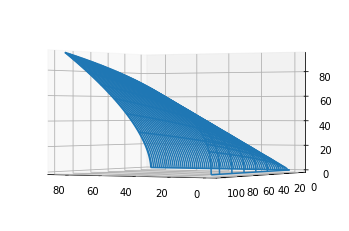

In [13]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
x = np.linspace(0, max_x, int(max_x*8))
y = np.linspace(0, max_y , int(max_y*8))
x,y= np.meshgrid(x,y)
U = x**alpha * y** beta

# Plot the surface.
#surf = ax.plot_surface(x, y, U, linewidth=3, antialiased=False)

#plt.show()

ax.plot_wireframe(x, y, U, rstride=120, cstride=10)
ax.view_init(0,120)

## first change the perspective up to rigth 


# graph budget constrain 

\begin{equation}
p_x X + p_y Y = I \\
x= \frac{ I - p_y Y}{p_x}
\end{equation}
then given the maximun value that we can consume denominated *max_y* we have 
```python
def constrain(x):
    """ The amount of y given x"""
    return max_y - (px/py)*x
```


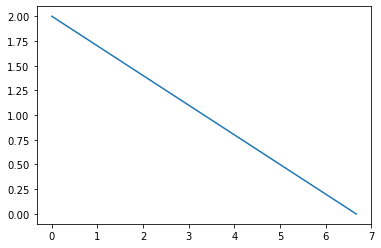

In [9]:

def constrain(x):
    """ The amount of y given x"""
    return max_y - (pricex/pricey)*x
qy= np.linspace(0, max_x)
plt.plot(qy , constrain(qy))

<ipython-input-10-b2303ff98046>:15: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(x, y, U, 12 , linestyles='dashed', color='black')


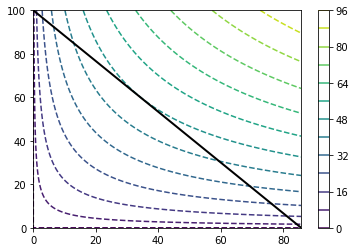

In [10]:
alpha =0.4
beta = 0.6
income =1200
pricex= 14
pricey= 12
import numpy as np
import matplotlib.pyplot as plt
## Max products
max_x = income/pricex
max_y = income/pricey
x = np.linspace(0, max_x, int(max_x*8))
y = np.linspace(0, max_y , int(max_y*8))
x,y= np.meshgrid(x,y)
U = x**alpha * y** beta
plt.contour(x, y, U, 12 , linestyles='dashed', color='black')
plt.colorbar() 
def constrain(x):
    """ The amount of y given x"""
    return max_y - (pricex/pricey)*x
qy= np.linspace(0, max_x , int(max_x*8))
plt.plot(qy , constrain(qy),  linewidth=2 , color='black')
plt.show()
